**Step 1: Install and Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

**Step 2: Load Dataset**

In [2]:
url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)
df = df[['label', 'tweet']]
df.columns = ['label', 'text']
df.head()

,label,text
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


**Step 3: Preprocess Text Data**

In [3]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove numbers and punctuation
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

df['clean_text'] = df['text'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nkeer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,label,text,clean_text
0,0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drags kids d...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer w...
2,0,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society motivation


**Step 4: TF-IDF Vectorization**

In [4]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['label']

**Step 5: Train/Test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 6: Train Logistic Regression Model**

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Step 7: Evaluate the Model**

In [7]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9516658845612389

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.36      0.51       456

    accuracy                           0.95      6393
   macro avg       0.93      0.68      0.74      6393
weighted avg       0.95      0.95      0.94      6393



**Step-8:Confusion Matrix**

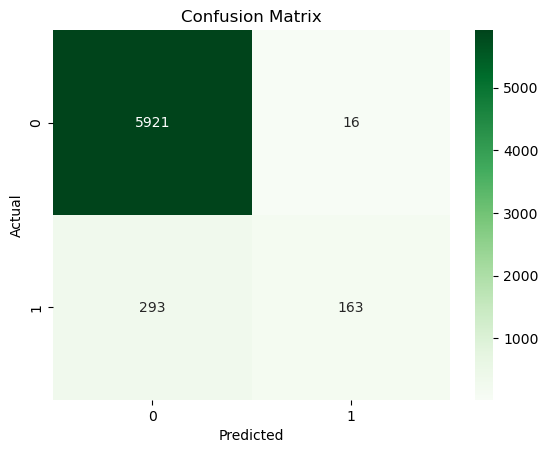

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()